# 1. What is a Support Vector Machine (SVM)?
SVM is a supervised learning algorithm used for classification and regression tasks.  
It finds the optimal hyperplane that separates data points of different classes with the maximum margin.

# 2. What is the difference between Hard Margin and Soft Margin SVM?
- Hard Margin: Assumes data is perfectly linearly separable, no misclassification allowed.  
- Soft Margin: Allows some misclassifications by introducing a penalty for errors, improving generalization.

# 3. What is the mathematical intuition behind SVM?
SVM aims to maximize the margin between support vectors of different classes while minimizing classification errors.  
Mathematically, it solves:
Minimize: (1/2)||w||²  
Subject to: yᵢ(w·xᵢ + b) ≥ 1

# 4. What is the role of Lagrange Multipliers in SVM?
They transform the constrained optimization problem into an unconstrained one using the Lagrangian dual form, enabling kernel methods.

# 5. What are Support Vectors in SVM?
Support vectors are the closest data points to the decision boundary that influence the position and orientation of the hyperplane.

# 6. What is a Support Vector Classifier (SVC)?
An SVC is an SVM model for classification tasks, which uses the optimal hyperplane to separate classes.

# 7. What is a Support Vector Regressor (SVR)?
SVR applies the SVM principle to regression problems, fitting a function within a specified margin of tolerance (ε).

# 8. What is the Kernel Trick in SVM?
It allows SVM to operate in higher-dimensional spaces without explicitly computing transformations by using kernel functions.

# 9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.
- Linear: Best for linearly separable data.  
- Polynomial: Captures polynomial relationships.  
- RBF: Handles complex, non-linear boundaries by mapping data into infinite dimensions.

# 10. What is the effect of the C parameter in SVM?
C controls the trade-off between maximizing margin and minimizing misclassification.  
- Large C: Low bias, high variance (less tolerance for misclassification).  
- Small C: High bias, low variance (more tolerance for misclassification).

# 11. What is the role of the Gamma parameter in RBF Kernel SVM?
Gamma defines the influence range of a single training example.  
- High gamma: Closer points affect the decision boundary.  
- Low gamma: Farther points have influence.

# 12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
Naïve Bayes is a probabilistic classifier based on Bayes’ theorem with the assumption that features are conditionally independent.  
It’s “naïve” because it ignores correlations between features.

# 13. What is Bayes’ Theorem?
P(A|B) = [P(B|A) * P(A)] / P(B)  
Where:  
P(A|B) = Posterior probability  
P(B|A) = Likelihood  
P(A) = Prior probability  
P(B) = Evidence

# 14. Differences between Gaussian, Multinomial, and Bernoulli Naïve Bayes.
- Gaussian: Assumes features are continuous and follow a normal distribution.  
- Multinomial: Best for discrete counts (e.g., word counts).  
- Bernoulli: For binary/boolean features.

# 15. When should you use Gaussian Naïve Bayes over other variants?
When features are continuous and approximately normally distributed.

# 16. Key assumptions made by Naïve Bayes.
- Features are conditionally independent given the class.  
- All features contribute equally to the outcome.

# 17. Advantages and disadvantages of Naïve Bayes.
Advantages:  
- Simple, fast, works well with small data.  
- Handles high-dimensional data well.  
Disadvantages:  
- Assumption of feature independence often unrealistic.  
- Poor performance if feature dependencies are strong.

# 18. Why is Naïve Bayes a good choice for text classification?
Because text features (word counts) are often independent and high-dimensional, making Naïve Bayes efficient and effective.

# 19. Compare SVM and Naïve Bayes for classification tasks.
- SVM: Works well with non-linear boundaries, robust to overfitting with proper tuning.  
- Naïve Bayes: Very fast, good for text, but may fail if features are dependent.

# 20. How does Laplace Smoothing help in Naïve Bayes?
It prevents zero probability for unseen feature values by adding a small constant (usually 1) to counts.


In [5]:
# 21. Python: Train an SVM Classifier on Iris dataset and evaluate accuracy.
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
model_svm = SVC()
model_svm.fit(X_train, y_train)
print("Accuracy:", model_svm.score(X_test, y_test))


Accuracy: 1.0


In [6]:
# 22. Python: Train two SVM classifiers (Linear & RBF) on Wine dataset, compare accuracies.
from sklearn.datasets import load_wine
wine = load_wine()
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)
svc_linear = SVC(kernel='linear')
svc_rbf = SVC(kernel='rbf')
svc_linear.fit(X_train_w, y_train_w)
svc_rbf.fit(X_train_w, y_train_w)
print("Linear Kernel Accuracy:", svc_linear.score(X_test_w, y_test_w))
print("RBF Kernel Accuracy:", svc_rbf.score(X_test_w, y_test_w))


Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 0.8055555555555556


In [7]:
# 23. Python: Train an SVR on Housing dataset, evaluate with MSE.
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
housing = fetch_california_housing()
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)
svr = SVR()
svr.fit(X_train_h, y_train_h)
y_pred_h = svr.predict(X_test_h)
print("MSE:", mean_squared_error(y_test_h, y_pred_h))


MSE: 1.3320115421348744


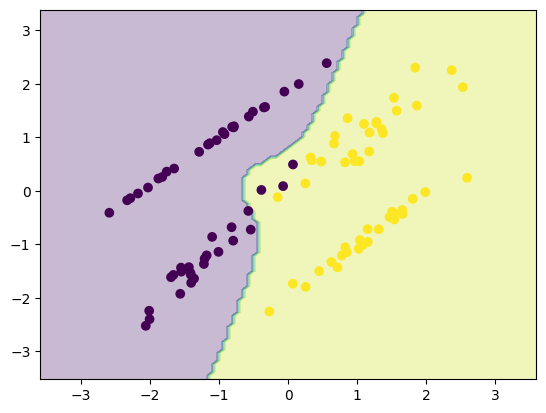

In [8]:
# 24. Python: Train SVM Classifier with Polynomial Kernel & visualize decision boundary.
# (Visualization part requires 2D data and matplotlib)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=42)
model_poly = SVC(kernel='poly', degree=3)
model_poly.fit(X, y)
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
Z = model_poly.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


In [9]:
# 25. Python: Train Gaussian Naïve Bayes on Breast Cancer dataset & evaluate accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
cancer = load_breast_cancer()
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train_c, y_train_c)
print("Accuracy:", gnb.score(X_test_c, y_test_c))

Accuracy: 0.9736842105263158


In [10]:
# 26. Python: Train Multinomial Naïve Bayes for text classification (20 Newsgroups).
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.naive_bayes import MultinomialNB
data_news = fetch_20newsgroups_vectorized()
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(data_news.data, data_news.target, test_size=0.2, random_state=42)
mnb = MultinomialNB()
mnb.fit(X_train_n, y_train_n)
print("Accuracy:", mnb.score(X_test_n, y_test_n))


Accuracy: 0.7445868316394167


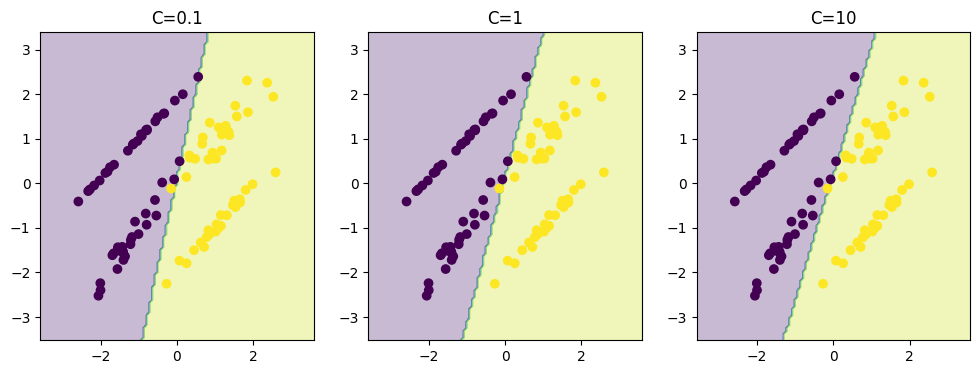

In [1]:
# 27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=42)
C_values = [0.1, 1, 10]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for idx, C in enumerate(C_values):
    model = SVC(C=C, kernel='linear')
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    axes[idx].contourf(xx, yy, Z, alpha=0.3)
    axes[idx].scatter(X[:,0], X[:,1], c=y)
    axes[idx].set_title(f'C={C}')
plt.show()


In [2]:
# 28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_bin, y_bin = make_classification(n_features=10, n_informative=5, n_classes=2, random_state=42)
X_bin = (X_bin > 0).astype(int)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train_b, y_train_b)
print("Accuracy:", bnb.score(X_test_b, y_test_b))


Accuracy: 0.85


In [11]:
# 29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.
from sklearn.preprocessing import StandardScaler

# Without scaling
model_no_scale = SVC()
model_no_scale.fit(X_train, y_train)
acc_no_scale = model_no_scale.score(X_test, y_test)

# With scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
model_scaled = SVC()
model_scaled.fit(X_train_s, y_train)
acc_scaled = model_scaled.score(X_test_s, y_test)

print("Accuracy without scaling:", acc_no_scale)
print("Accuracy with scaling:", acc_scaled)


Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


In [13]:
# 30. Write a Python program to train a Gaussian Naïve Bayes model and compare predictions before and after Laplace Smoothing.
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

gnb_no_smooth = GaussianNB(var_smoothing=1e-9)
gnb_no_smooth.fit(X_train, y_train)
pred_no_smooth = gnb_no_smooth.score(X_test, y_test)

gnb_smooth = GaussianNB(var_smoothing=1e-5)
gnb_smooth.fit(X_train, y_train)
pred_smooth = gnb_smooth.score(X_test, y_test)

print("Accuracy without Laplace smoothing:", pred_no_smooth)
print("Accuracy with Laplace smoothing:", pred_smooth)

# 31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune hyperparameters (C, gamma, kernel).
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_grid, cv=5)
grid_svm.fit(X_train, y_train)
print("Best Parameters:", grid_svm.best_params_)
print("Best Score:", grid_svm.best_score_)


Accuracy without Laplace smoothing: 1.0
Accuracy with Laplace smoothing: 1.0
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score: 0.9583333333333334


In [14]:
# 32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting.
from sklearn.datasets import make_classification
X_imb, y_imb = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1], n_informative=3, n_redundant=0, flip_y=0, n_features=5, n_clusters_per_class=1, n_samples=200, random_state=10)
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_imb, y_imb, test_size=0.2, random_state=42)

model_no_weight = SVC()
model_no_weight.fit(X_train_i, y_train_i)
acc_no_weight = model_no_weight.score(X_test_i, y_test_i)

model_weight = SVC(class_weight='balanced')
model_weight.fit(X_train_i, y_train_i)
acc_weight = model_weight.score(X_test_i, y_test_i)

print("Accuracy without class weight:", acc_no_weight)
print("Accuracy with class weight:", acc_weight)


Accuracy without class weight: 1.0
Accuracy with class weight: 0.95


In [15]:
# 33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.
# (Example with fake text dataset)
from sklearn.feature_extraction.text import CountVectorizer
emails = ["Win money now", "Hello friend, how are you?", "Claim your free prize", "Meeting tomorrow at 10"]
labels = [1, 0, 1, 0]  # 1 = spam, 0 = not spam
vectorizer = CountVectorizer()
X_email = vectorizer.fit_transform(emails)
nb_spam = MultinomialNB()
nb_spam.fit(X_email, labels)
print("Predictions:", nb_spam.predict(X_email))


Predictions: [1 0 1 0]


In [16]:
# 34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare accuracy.
model_svm_comp = SVC()
model_nb_comp = GaussianNB()
model_svm_comp.fit(X_train, y_train)
model_nb_comp.fit(X_train, y_train)
print("SVM Accuracy:", model_svm_comp.score(X_test, y_test))
print("Naïve Bayes Accuracy:", model_nb_comp.score(X_test, y_test))


SVM Accuracy: 1.0
Naïve Bayes Accuracy: 1.0


In [17]:
# 35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=5)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)
nb_sel = GaussianNB()
nb_sel.fit(X_train_sel, y_train)
print("Accuracy after feature selection:", nb_sel.score(X_test_sel, y_test))


Accuracy after feature selection: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=5 is greater than n_features=4. All the features will be returned.
  warnings.warn(


In [18]:
# 36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare accuracy.
svc_ovr = SVC(decision_function_shape='ovr')
svc_ovo = SVC(decision_function_shape='ovo')
svc_ovr.fit(X_train_w, y_train_w)
svc_ovo.fit(X_train_w, y_train_w)
print("OvR Accuracy:", svc_ovr.score(X_test_w, y_test_w))
print("OvO Accuracy:", svc_ovo.score(X_test_w, y_test_w))


OvR Accuracy: 0.8055555555555556
OvO Accuracy: 0.8055555555555556


In [19]:
# 37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare accuracy.
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    model_k = SVC(kernel=k)
    model_k.fit(X_train_c, y_train_c)
    print(f"Kernel={k}, Accuracy={model_k.score(X_test_c, y_test_c)}")


Kernel=linear, Accuracy=0.956140350877193
Kernel=poly, Accuracy=0.9473684210526315
Kernel=rbf, Accuracy=0.9473684210526315


In [20]:
# 38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute average accuracy.
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(SVC(), iris.data, iris.target, cv=skf)
print("Average Accuracy:", scores.mean())


Average Accuracy: 0.9666666666666666


In [21]:
# 39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.
nb_prior1 = GaussianNB(priors=[0.3, 0.7])
nb_prior2 = GaussianNB(priors=[0.5, 0.5])
nb_prior1.fit(X_train_c, y_train_c)
nb_prior2.fit(X_train_c, y_train_c)
print("Accuracy (prior 0.3,0.7):", nb_prior1.score(X_test_c, y_test_c))
print("Accuracy (prior 0.5,0.5):", nb_prior2.score(X_test_c, y_test_c))


Accuracy (prior 0.3,0.7): 0.9649122807017544
Accuracy (prior 0.5,0.5): 0.9736842105263158


In [22]:
# 40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.
from sklearn.feature_selection import RFE
svc_rfe = SVC(kernel='linear')
selector_rfe = RFE(svc_rfe, n_features_to_select=5)
selector_rfe.fit(X_train, y_train)
X_train_rfe = selector_rfe.transform(X_train)
X_test_rfe = selector_rfe.transform(X_test)
svc_rfe.fit(X_train_rfe, y_train)
print("Accuracy after RFE:", svc_rfe.score(X_test_rfe, y_test))


Accuracy after RFE: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(


In [23]:
# 41. Write a Python program to train an SVM Classifier and evaluate performance using Precision, Recall, and F1-Score instead of accuracy.
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred_svm = model_svm.predict(X_test)
print("Precision:", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall:", recall_score(y_test, y_pred_svm, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred_svm, average='macro'))


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [24]:
# 42. Write a Python program to train a Naïve Bayes Classifier and evaluate performance using Log Loss.
from sklearn.metrics import log_loss
y_pred_prob = gnb.predict_proba(X_test_c)
print("Log Loss:", log_loss(y_test_c, y_pred_prob))


Log Loss: 0.2037342715214191


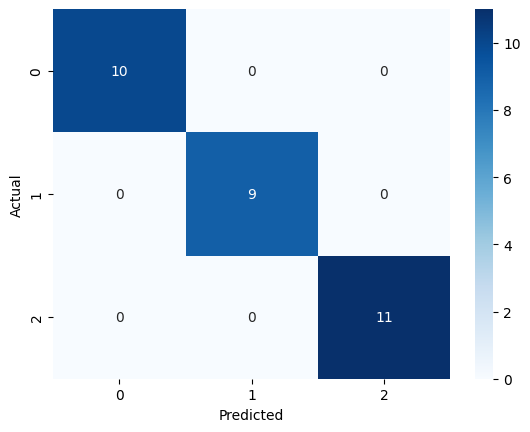

In [25]:
# 43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [26]:
# 44. Write a Python program to train an SVM Regressor (SVR) and evaluate performance using Mean Absolute Error (MAE).
from sklearn.metrics import mean_absolute_error
svr_mae = SVR()
svr_mae.fit(X_train_h, y_train_h)
y_pred_mae = svr_mae.predict(X_test_h)
print("MAE:", mean_absolute_error(y_test_h, y_pred_mae))


MAE: 0.8599506583445761


In [27]:
# 45. Write a Python program to train a Naïve Bayes classifier and evaluate performance using the ROC-AUC score.
from sklearn.metrics import roc_auc_score
y_prob_c = gnb.predict_proba(X_test_c)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test_c, y_prob_c))


ROC-AUC: 0.9983622666229938


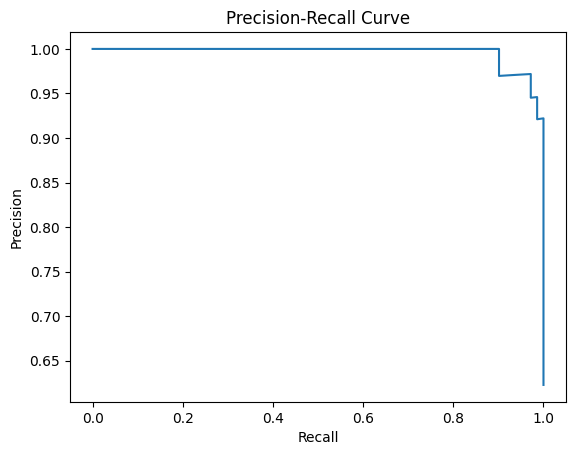

In [29]:
# 46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Load binary dataset
data_bin = load_breast_cancer()
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(data_bin.data, data_bin.target, test_size=0.2, random_state=42)

# Train SVM with probability outputs enabled
model_svm_bin = SVC(probability=True)
model_svm_bin.fit(X_train_bin, y_train_bin)

# Get decision scores
y_scores_svm_bin = model_svm_bin.decision_function(X_test_bin)

# Compute precision-recall
prec, rec, _ = precision_recall_curve(y_test_bin, y_scores_svm_bin, pos_label=1)

# Plot
plt.plot(rec, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
